# Differential (gene) Expression

<div class="alert alert-info">
For example, you could use this module to find genes whose expression levels match and oppose a specific gene expression for a given set of samples. In this notebook we will use gene M89957_at [IGB Immunoglobulin-associated beta (B29)] as the profile to match.

A note on some of the parameters we are using:
- **gene expression**: We use the classic ALL/AML microarray dataset http://datasets.genepattern.org/all_aml/all_aml_test.gct.

- **phenotype file**: We will use this CLS file to identify the samples' phenotype  http://datasets.genepattern.org/all_aml/all_aml_test.cls.

- **name of phenotype to match**: Within the GCT file we provide we will use the gene **M89957_at**.

In [1]:
import genepattern
import cuzcatlan as cusca

from cuzcatlan import differential_gene_expression
import pandas as pd
import urllib.request
from cuzcatlan import compute_information_coefficient
from cuzcatlan import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(differential_gene_expression, name="Differential gene expression, discrete pheotype.", 
                        description="Sort genes according to their association with a discrete phenotype or class vector.",
                        parameters={
                                "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'Pearson Correlation Matching':"custom_pearson_corr",
                                                                 'Information Correlation Matching':"compute_information_coefficient",
                                                                }
                                                     }
                        })

GPUIBuilder(description='Sort genes according to their association with a discrete phenotype or class vector.', function_import='differential_gene_expression', name='Differential gene expression, discrete pheotype.', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'choices': []}, {'name': 'phenotype_file', 'label': 'phenotype_file', 'optional': False, 'default': '', 'description': 'CLS filename; input binary phenotype/class distinction', 'hide': False, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': False, 'default': '', 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': False, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'choices': {'Pearson Correlation Matching': 'custom_pearson_corr', 'Information Correlation Matching': 'compute_information_coefficient'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': None, 'description': 'The title of the heatmap', 'hide': False, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x10c21cbf8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


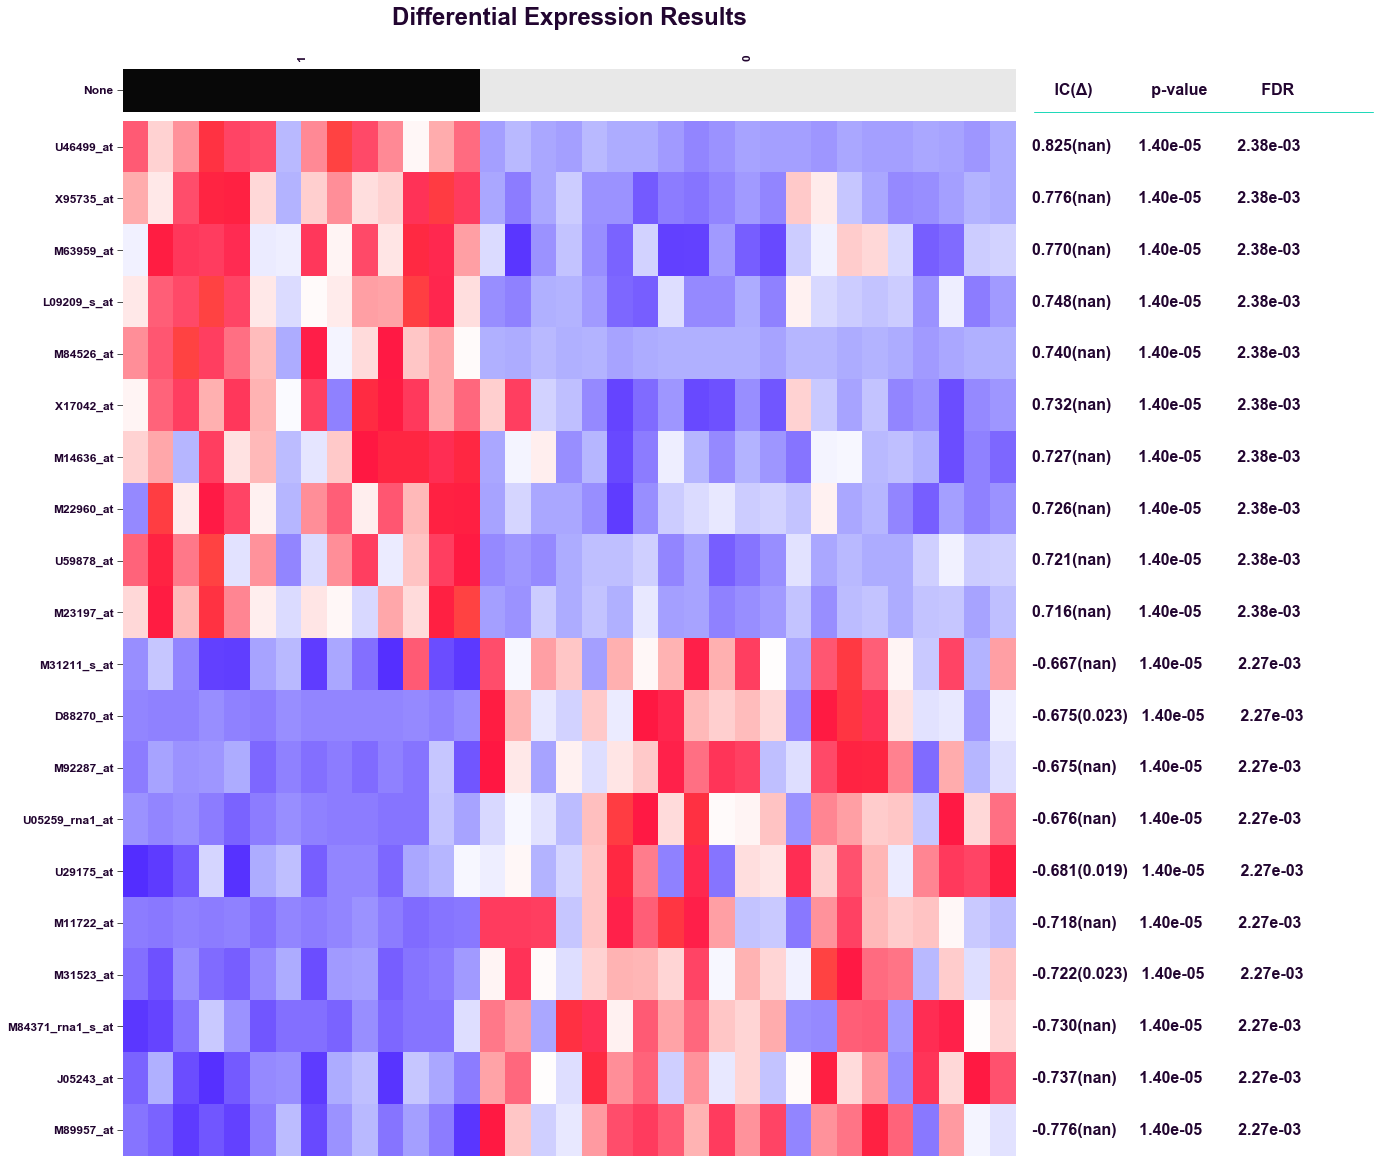

In [3]:
de_results = differential_gene_expression(gene_expression="http://datasets.genepattern.org/all_aml/all_aml_test.gct", phenotype_file="http://datasets.genepattern.org/all_aml/all_aml_test.cls", output_filename="None", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="Differential Expression Results", random_seed=20121020)